# SUYASH PRATAP SINGH(181B226)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\train.csv')

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


We can se that:
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness

In [7]:
print("Skewness: %f" %df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
Covariance=df.cov()
Covariance

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,177755.000000,198.968472,-108.390207,-1.398197e+05,-16.539068,5.915696,-1.618818e+02,-191.474297,-3.842688e+03,-9.661021e+02,...,-1.566468e+03,-1.332214e+01,74.450651,-576.428376,31.270391,966.275531,-1305.726525,24.133653,0.398561,-7.340732e+05
MSSubClass,198.968472,1789.338306,-404.439075,-5.901742e+04,1.908771,-2.792117,3.558134e+01,35.439934,1.758378e+02,-1.347356e+03,...,-6.669453e+01,-1.709661e+01,-31.119180,-54.348569,-61.394007,14.076652,-161.243759,-1.553607,-1.202630,-2.832337e+05
LotFrontage,-108.390207,-404.439075,589.749169,8.199814e+04,8.673047,-1.573935,9.510848e+01,45.744675,8.712074e+02,2.635953e+03,...,2.587889e+02,2.438681e+02,16.022614,48.936214,56.264418,194.586364,15.520479,0.735389,0.240700,7.124262e+05
LotArea,-139819.667238,-59017.418634,81998.138404,9.962565e+07,1460.548271,-62.602871,4.289113e+03,2841.343594,1.884014e+05,9.746908e+05,...,2.148006e+05,5.606253e+04,-11188.088772,5976.210971,24020.024881,31148.209380,188508.749657,32.517342,-189.050203,2.092111e+08
OverallQual,-16.539068,1.908771,8.673047,1.460548e+03,1.912679,-0.141484,2.390622e+01,15.723417,1.030121e+02,1.511770e+02,...,4.141573e+01,2.829764e+01,-9.630806,1.231398,5.003537,3.620945,-21.548945,0.264785,-0.050229,8.690413e+04
OverallCond,5.915696,-2.792117,-1.573935,-6.260287e+01,-0.141484,1.238322,-1.263671e+01,1.694152,-2.581896e+01,-2.346427e+01,...,-4.649741e-01,-2.402762e+00,4.785160,0.832039,3.400819,-0.088745,37.970669,-0.010563,0.064953,-6.882739e+03
YearBuilt,-161.881768,35.581337,95.108483,4.289113e+03,23.906215,-12.636709,9.122154e+02,369.675456,1.725993e+03,3.437028e+03,...,8.513053e+02,3.775838e+02,-714.886948,27.763434,-84.815514,6.006353,-515.209195,1.012426,-0.546237,1.254637e+06
YearRemodAdd,-191.474297,35.439934,45.744675,2.841344e+03,15.723417,1.694152,3.696755e+02,426.232822,6.716764e+02,1.209533e+03,...,5.323509e+02,3.095486e+02,-244.692937,27.410061,-44.594964,4.835329,-105.358566,1.199517,0.980046,8.317079e+05
MasVnrArea,-3842.687941,175.837842,871.207424,1.884014e+05,103.012054,-25.818956,1.725993e+03,671.676358,3.278497e+04,2.182760e+04,...,3.626330e+03,1.503301e+03,-1218.999064,100.044636,622.125969,85.516034,-2685.666442,-2.915638,-1.973363,6.854858e+06
BsmtFinSF1,-966.102125,-1347.355751,2635.952669,9.746908e+05,151.176998,-23.464270,3.437028e+03,1209.532821,2.182760e+04,2.080255e+05,...,1.167953e+04,3.377322e+03,-2851.840396,353.685020,1577.237193,2574.473738,808.155748,-19.393195,8.697797,1.400137e+07


In [9]:
Correlation=df.corr()
Correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# Data Visualization

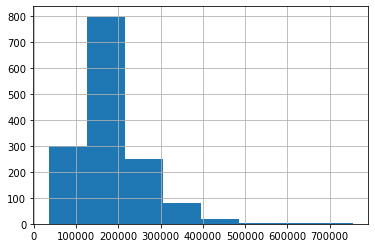

In [10]:
%matplotlib inline
df['SalePrice'].hist(bins=8)

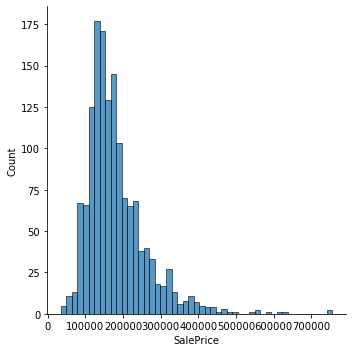

In [11]:
sns.displot(df['SalePrice'])

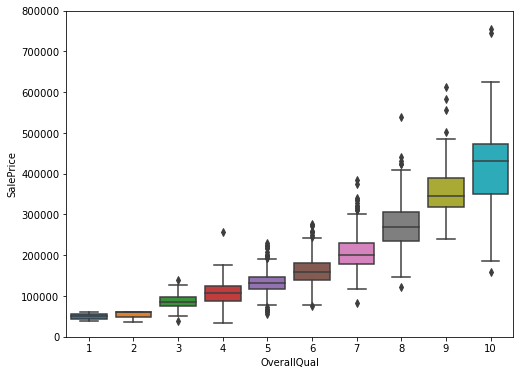

In [18]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

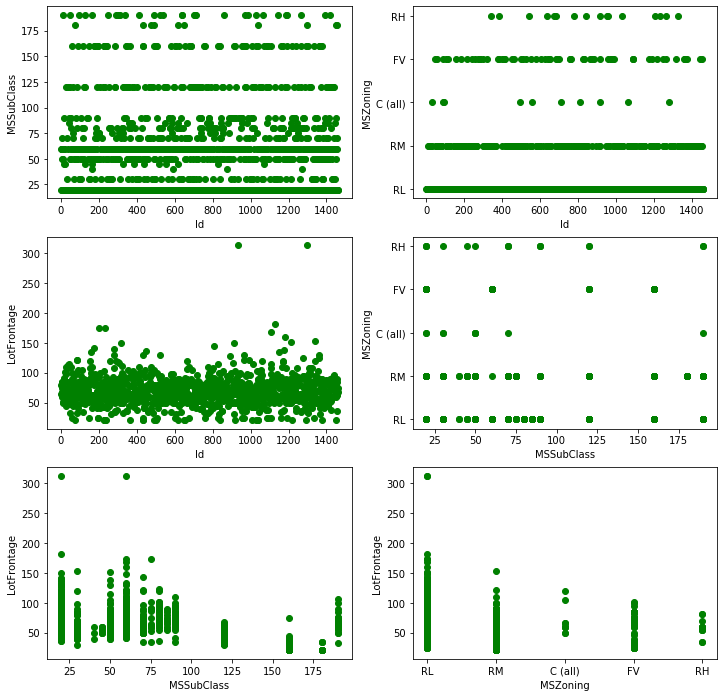

In [15]:
fig, axes=plt.subplots(3,2,figsize=(12,12))
index=0
for i in range(3):
    for j in range(i+1,4):
        ax1=int(index/2)
        ax2=index%2
        axes[ax1][ax2].scatter(df[df.columns[i]], df[df.columns[j]],color='green')
        
        axes[ax1][ax2].set_xlabel(df.columns[i])
        axes[ax1][ax2].set_ylabel(df.columns[j])
        index=index+1

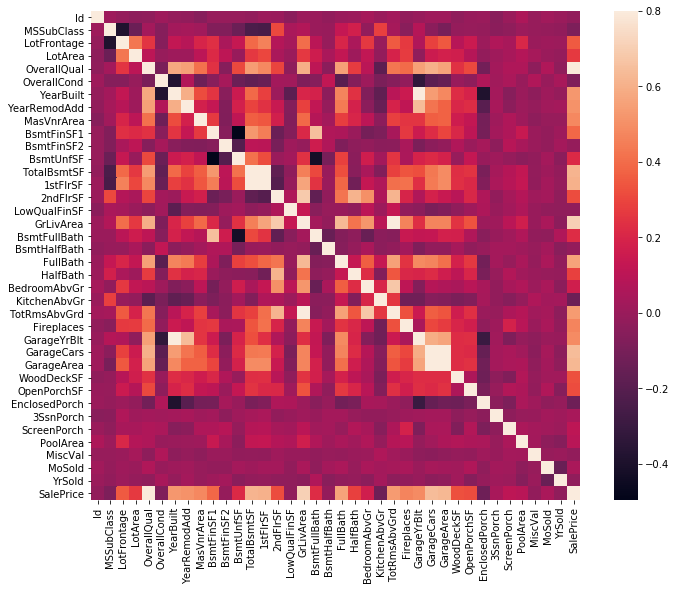

In [22]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Thank You 